In [236]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import pds_plots as ppl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [284]:
fname = "coords_20190613_3.npz"
f = np.load(fname)


# bbox = [[0, 1500], [0-20, 700], [0, 200]]
bbox = [[0, 500], [0-20, 500], [0, 200]]


def limit_to_box(x, box):
    mf = x.copy()
    
    for i, t in enumerate(box):
        mf = mf[mf[:,i]>=t[0], :]
        mf = mf[mf[:,i]<=t[1], :]
    return mf

def fix_coors(x):
    y = x-np.ones(x.shape[1])*25
    box = [bbox[0], [bbox[1][0]+20, bbox[1][1]], bbox[2]]
    return limit_to_box(y, box[:x.shape[1]])

mf = f['mf']
mf = fix_coors(mf)

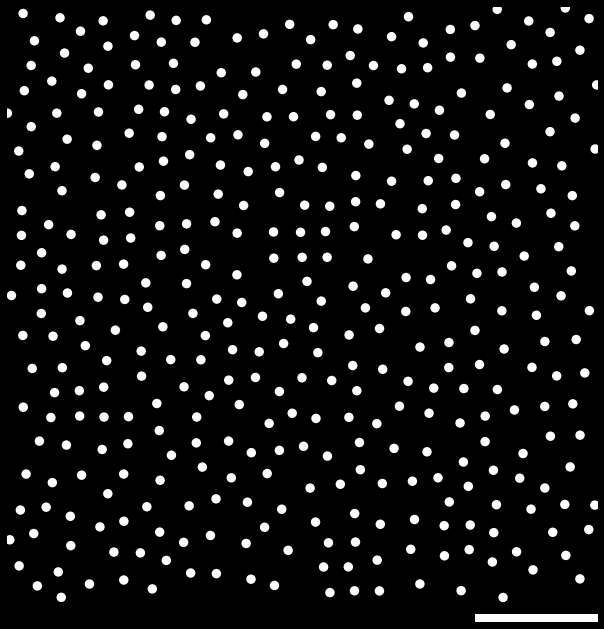

In [285]:
bbox = bbox[:2]

plt.style.use('dark_background')
ax = ppl.plot_mf_1(mf, bbox, 4, save=False)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0]+2.5, bbox[1][0]+2.5], 'w', linewidth=10)
# ppl.plot_mf_2(mf, [1500, 700], save=True)
plt.tight_layout()
plt.savefig('mf.png', dpi=300/2.54)

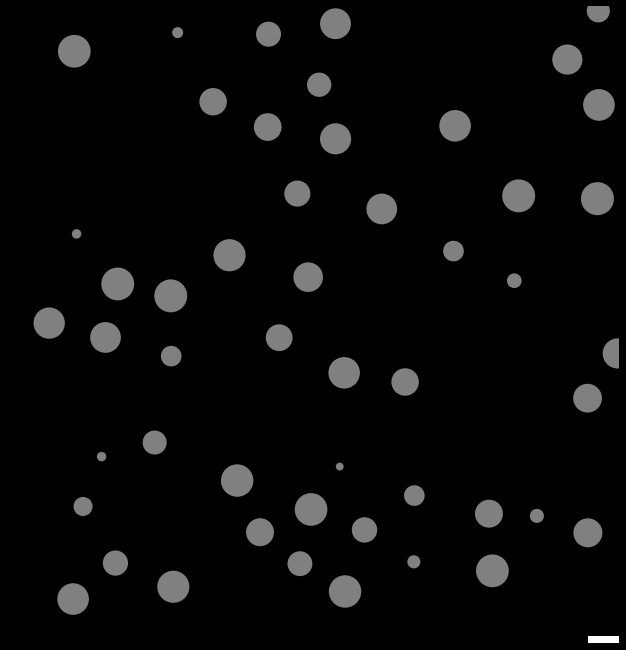

In [286]:
bbox = [[0, 500], [0-20, 500], [0, 200]]

goc = f['goc']
goc = fix_coors(goc)

ax = ppl.plot_goc(goc, bbox, 100, 13.5)
ax.plot([bbox[0][1]-20, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc.png', dpi=300/2.54)

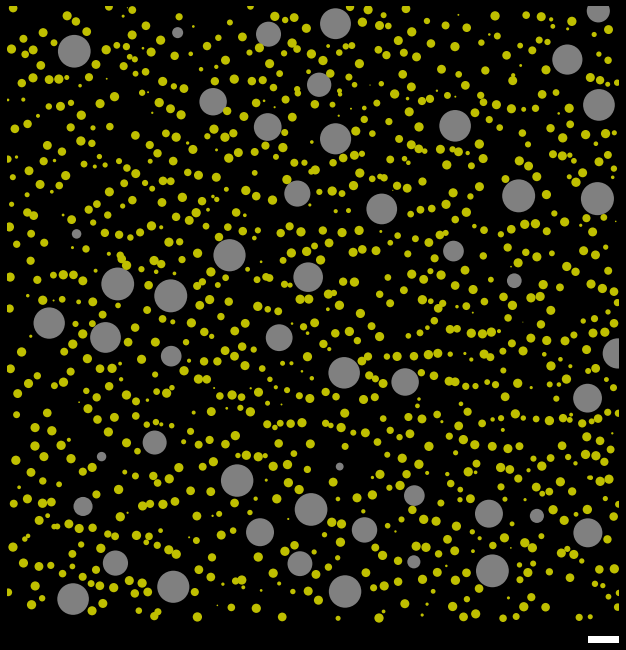

In [287]:
glo = f['glo']
glo = fix_coors(glo)

ax = ppl.plot_goc_glo((goc, 13.5), (glo, 7.6 / 2), bbox, 100)
ax.plot([bbox[0][1]-20, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc+glo.png', dpi=300/2.54)
#         plt.savefig('goc+glo.png', dpi=300

In [288]:
grc = f['grc_nop']
grc = fix_coors(grc)

ax = ppl.plot_all_pop(
    (goc, 13.5),
    (glo, 7.6 / 2),
    (grc, 3),
    bbox, 100)
ax.plot([bbox[0][1]-20, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all.png', dpi=300)

KeyError: 'grc_nop is not a file in the archive'

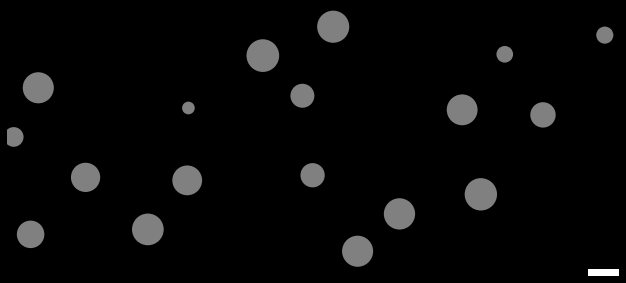

In [258]:
def to_saggit(x):
    y = x.copy()
    y[:,0] = x[:,1]
    y[:,1] = x[:,2]
    y[:,2] = x[:,0]    
    return y

def to_medlat(x):
    y = x.copy()
    y[:,0] = x[:,0]
    y[:,1] = x[:,2]
    y[:,2] = x[:,1]
    return y


goc1 = to_saggit(goc)
glo1 = to_saggit(glo)
grc1 = to_saggit(grc)

bbox = [[0, 500], [0-20, 200], [0, 500]]

ax = ppl.plot_goc(goc1, bbox, 100, 13.5)
ax.plot([bbox[0][1]-20, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

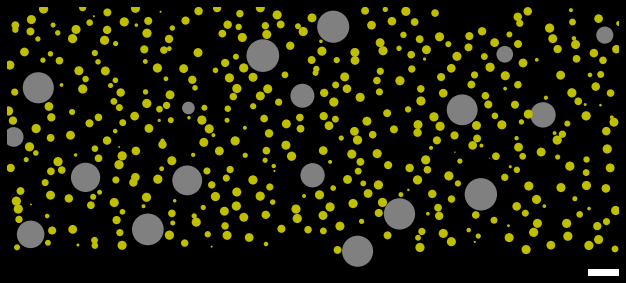

In [259]:
ax = ppl.plot_goc_glo((goc1, 13.5), (glo1, 6.6 / 1.75), bbox, 100)
ax.plot([bbox[0][1]-20, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

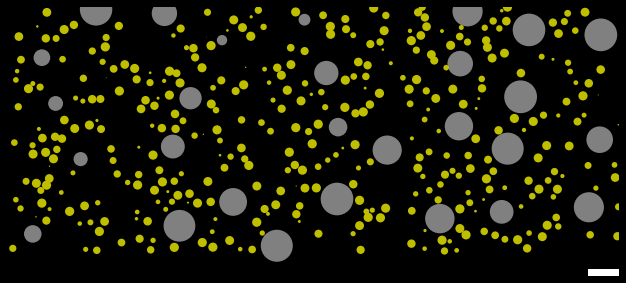

In [260]:
goc2 = to_medlat(goc)
glo2 = to_medlat(glo)
# grc = to_yzx(grc)

ax = ppl.plot_goc_glo((goc2, 13.5), (glo2, 6.6 / 1.75), bbox, 100)
ax.plot([bbox[0][1]-20, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

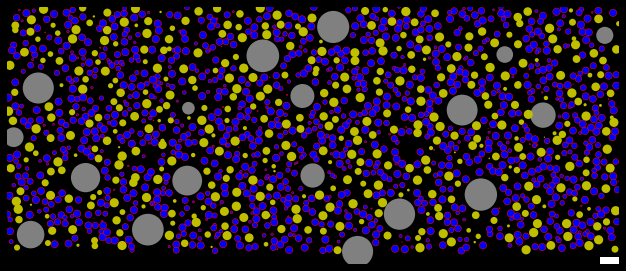

In [283]:
bbox = [[0, 500], [0-10, 200], [0, 500]]

ax = ppl.plot_all_pop(
    (goc1, 13.5),
    (glo1, 7.6/2),
    (grc1, 3),
    bbox, 100)
ax.plot([bbox[0][1]-10, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all_sag.png', dpi=300)